In [1]:
import pandas as pd

df = pd.read_csv('../data/cleaned_COT_data.csv',index_col=0)
for i in df.columns:
    df[i] = pd.to_numeric(df[i].values.reshape(-1),errors='coerce') 
df

,H-110 COT,H-120 COT,H-130 COT,H-140 COT,H-150 COT,H-160 COT,H-170 COT,H-180 COT,H-190 COT,H-110 裂解度,...,H-111 裂解度,H-121 裂解度,H-131 p1 裂解度,H-131 p2 裂解度,H-131 p3 裂解度,H-131 p4 裂解度,H-141 p1 裂解度,H-141 p2 裂解度,H-141 p3 裂解度,H-141 p4 裂解度
日期,,,,,,,,,,,,,,,,,,,,,
2018-08-01 00:00:00,820.046387,29.800571,820.729370,820.600525,820.039612,819.586975,820.273438,821.509033,820.206848,1.136864,...,51.918655,56.079163,0.737323,1.926079,2.538001,0.788595,0.955707,1.425715,1.367721,1.333376
2018-08-01 00:10:00,818.146851,29.580025,818.534668,818.692932,818.604431,816.963257,818.849060,816.913757,819.320862,1.138114,...,51.831528,56.290543,0.737323,1.926079,2.499612,0.777962,0.971119,1.500115,1.355542,1.308600
2018-08-01 00:20:00,818.323975,29.494396,819.611572,819.289856,820.808228,819.384216,819.460083,820.118835,819.244202,1.137114,...,52.214375,56.338554,0.737323,1.926079,2.494183,0.781778,0.975402,1.406393,1.361863,1.315129
2018-08-01 00:30:00,819.604675,29.330263,819.857727,819.296204,819.349243,819.066467,818.818909,818.713257,819.158691,1.140445,...,52.014725,56.083778,0.737323,1.926079,2.458577,0.779007,0.975402,1.499078,1.323431,1.267936
2018-08-01 00:40:00,821.526184,29.456963,819.666077,820.332581,820.627075,820.719360,819.730835,821.595703,820.747253,1.141850,...,51.780170,56.167366,0.737323,1.926079,2.446416,0.781416,0.973371,1.441758,1.343849,1.280648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 23:10:00,27.408436,27.526560,27.766571,27.404127,26.939030,27.202906,26.899256,26.655487,27.490553,0.000000,...,100.000000,100.000000,0.967655,2.934888,0.867311,0.882484,0.000000,0.000000,0.000000,0.000000
2021-06-30 23:20:00,27.407352,27.488029,27.798372,27.398758,26.901344,27.243582,26.871965,26.637991,27.498505,0.000000,...,100.000000,100.000000,0.967655,2.934888,0.867311,0.882484,0.000000,0.000000,0.000000,0.000000
2021-06-30 23:30:00,27.393206,27.499577,27.752710,27.399584,26.891518,27.195532,26.831932,26.626566,27.481943,0.000000,...,100.000000,100.000000,0.967655,2.934888,0.867311,0.882484,0.000000,0.000000,0.000000,0.000000


In [2]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 28 columns.
There are 28 columns that have missing values.


,Missing Values,% of Total Values
H-130 COT,112,0.1
H-130 裂解度,112,0.1
H-140 裂解度,112,0.1
H-140 COT,111,0.1
H-150 COT,110,0.1
H-160 裂解度,109,0.1
H-190 裂解度,109,0.1
H-141 p3 裂解度,109,0.1
H-141 p2 裂解度,109,0.1
H-141 p1 裂解度,109,0.1


In [3]:
df.corr().abs().style.background_gradient()

,H-110 COT,H-120 COT,H-130 COT,H-140 COT,H-150 COT,H-160 COT,H-170 COT,H-180 COT,H-190 COT,H-110 裂解度,H-120 裂解度,H-130 裂解度,H-140 裂解度,H-150 裂解度,H-160 裂解度,H-170 裂解度,H-180 裂解度,H-190 裂解度,H-111 裂解度,H-121 裂解度,H-131 p1 裂解度,H-131 p2 裂解度,H-131 p3 裂解度,H-131 p4 裂解度,H-141 p1 裂解度,H-141 p2 裂解度,H-141 p3 裂解度,H-141 p4 裂解度
H-110 COT,1.000000,0.128343,0.273629,0.102208,0.124267,0.133669,0.166457,0.089318,0.137661,0.006186,0.124716,0.008688,0.007659,0.016429,0.003858,0.040224,0.009354,0.005408,0.005194,0.012897,0.036297,0.251920,0.137604,0.034659,0.007705,0.006586,0.241728,0.246301
H-120 COT,0.128343,1.000000,0.340508,0.263036,0.113752,0.192552,0.075358,0.237513,0.216902,0.005726,0.189995,0.003838,0.000238,0.027336,0.003630,0.047487,0.001024,0.005289,0.063633,0.055965,0.018836,0.235328,0.072349,0.028327,0.004283,0.003846,0.038380,0.023966
H-130 COT,0.273629,0.340508,1.000000,0.209468,0.194155,0.262084,0.240979,0.325942,0.165567,0.005203,0.057168,0.012638,0.012644,0.042397,0.003693,0.063489,0.003305,0.004040,0.144738,0.137302,0.041254,0.277992,0.038429,0.005393,0.005009,0.003887,0.024750,0.038810
H-140 COT,0.102208,0.263036,0.209468,1.000000,0.091699,0.323819,0.141553,0.103669,0.091848,0.007956,0.060028,0.017108,0.017502,0.016044,0.003983,0.051074,0.000740,0.004533,0.100923,0.101736,0.115153,0.306935,0.004140,0.002681,0.004993,0.003044,0.039665,0.047897
H-150 COT,0.124267,0.113752,0.194155,0.091699,1.000000,0.149572,0.010422,0.197954,0.122679,0.006223,0.064560,0.019315,0.019262,0.001275,0.004605,0.042520,0.007134,0.001656,0.000635,0.025304,0.079571,0.373793,0.094988,0.115404,0.004325,0.006666,0.037694,0.015157
H-160 COT,0.133669,0.192552,0.262084,0.323819,0.149572,1.000000,0.161631,0.181633,0.116179,0.061740,0.121290,0.012281,0.012403,0.015929,0.003125,0.052510,0.012080,0.004635,0.142736,0.146945,0.183137,0.177415,0.130923,0.085859,0.004013,0.004619,0.008171,0.022784
H-170 COT,0.166457,0.075358,0.240979,0.141553,0.010422,0.161631,1.000000,0.106151,0.216150,0.007045,0.153312,0.018995,0.017872,0.015412,0.004310,0.047892,0.004553,0.005490,0.099029,0.103055,0.018222,0.161439,0.073113,0.055856,0.000658,0.000848,0.079811,0.063553
H-180 COT,0.089318,0.237513,0.325942,0.103669,0.197954,0.181633,0.106151,1.000000,0.146303,0.005193,0.101137,0.014889,0.014843,0.009505,0.003610,0.046962,0.059426,0.007017,0.053239,0.045173,0.175407,0.126197,0.137530,0.078422,0.000263,0.000961,0.046845,0.060613
H-190 COT,0.137661,0.216902,0.165567,0.091848,0.122679,0.116179,0.216150,0.146303,1.000000,0.005943,0.140979,0.006594,0.008232,0.019675,0.004404,0.059034,0.000114,0.004557,0.022042,0.011572,0.016221,0.130939,0.056999,0.040201,0.007221,0.012408,0.018624,0.044119
H-110 裂解度,0.006186,0.005726,0.005203,0.007956,0.006223,0.061740,0.007045,0.005193,0.005943,1.000000,0.206370,0.000880,0.000850,0.001321,0.000030,0.001182,0.000591,0.000204,0.002532,0.001037,0.010319,0.009690,0.010621,0.007557,0.000014,0.000165,0.003163,0.001508


C:\Users\ricky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ricky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 35299 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ricky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ricky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35010 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ricky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 35299 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ricky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24230 missing from curre

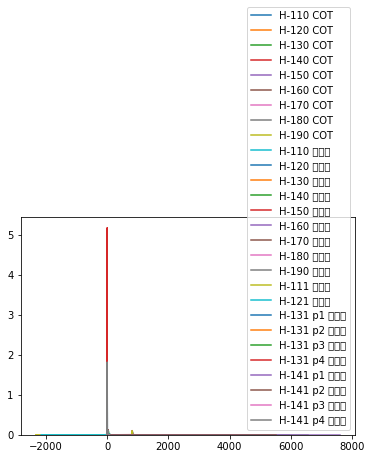

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.columns:
    sns.kdeplot(df[i],label=i)
plt.show()